# Explore here

In [801]:
!pip install missingno lazypredict scikit-optimize statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [802]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler


1.Carga de datos

In [803]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
pd.set_option('display.max_columns', None)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Paso 2: Exploración y limpieza de datos

Descriptivo

In [804]:
#Observar la cantidad de filas y columnas
df.shape

(48895, 16)

Contamos con un total de 48895 viviendas y 16 variables.

In [805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

En cuanto a tipos de datos tenemos:

*6 características categóricas (nombre,nombre_host, grupo_vecindario, vecindario,tipo_habitación y última_revisión,)

*10 características numéricas (id, id_host,latitud, longitud, precio, mínimo_noches, número_de_reseñas, reseñas_por_mes, recuento_calculado_de_listings_host y disponibilidad_365)

In [806]:
#Observar las variables que toman siempre el mismo valor
cont_unique = df.nunique()
cont_unique

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

En nuestro conjunto de datos, no hemos identificado columnas que mantengan un valor constante para todas las viviendas.

In [807]:
#Comrpobación de que no existan datos duplicados
df.duplicated().sum()

0

In [808]:
# Verificar que no hay filas duplicadas
df.drop("id", axis = 1).duplicated().sum()

0

In [809]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


El resumen de datos de nuestro data set podemos ver que el precio medio de los alquileres es de 152,72 pero que existen propiedades donde el precio detallado es 0 y en el otro extremo hay viviendas donde su precio es de 10.000 dolares. En relacion a la estadía si bien la media es de 7 noche, cabe destacar que el valor mínimo es de 1 y la cantidad máxmia encontrada es de 1250 noches. En cuanto al número de reseñas podemos destacar que tiene una media de 23.17, un mínimo de 0 y un máximo de 629.

Pasamos a eliminar las columnas irrelevantes

In [810]:
df.drop(["id","name","host_name","host_id","last_review", "reviews_per_month"], axis = 1, inplace = True)

In [811]:
#disponibilidad =df.sort_values('availability_365', ascending=False)
disponibilidad_de365 = df[df['availability_365'] == 0]
disponibilidad_de365.shape

(17533, 10)

In [812]:
#Procedemos a eliminar la variable availability_365
df.drop(["availability_365"], axis = 1, inplace = True)

Análisis de variables univariadas 
Analizaremos la cantidad de unidades en relación a los Distritos,Barrios y Tipo de unidad

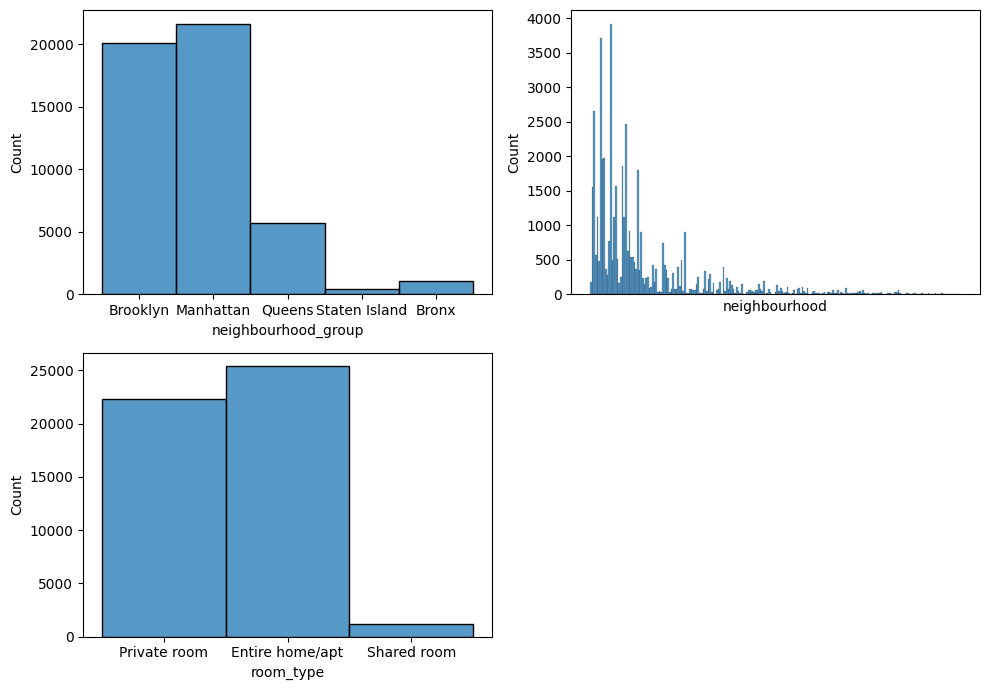

In [813]:
# Analisis variables categoricas

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Crear Histogram

sns.histplot(ax = axis[0,0], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[0,1], data = df, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = "room_type")

fig.delaxes(axis[1, 1])
# Ajustar
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos observar lo siguiente en el histograma:

1-En nuestro conjunto de datos tenemos 5 distritos y analizaremos cada auno de ellos.

2-Son muchos barrios que podría valer la pena analizarlos según el Distrito.

3-Las unidades que mas estan en alquiler son Casas o Apartementos enteros y Habitaciones privadas, en tercer lugar y muy lejos aparecen habitaciones compartidas.

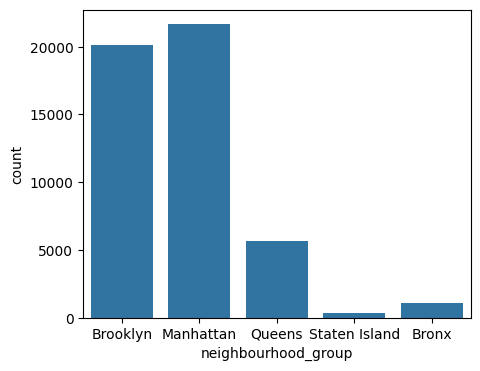

In [814]:
#ANALISIS CATEGORICO-CATEGORICO
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df, x = "neighbourhood_group")

# Show the plot
plt.show()

+ Podemos concluir que el Dsitrito con mas undiades en alquiler es Manhattan y luego Brooklyn, se puede observar que el Distrito de Stanten Islan posee un número muy bajo de unidades en alquiler.

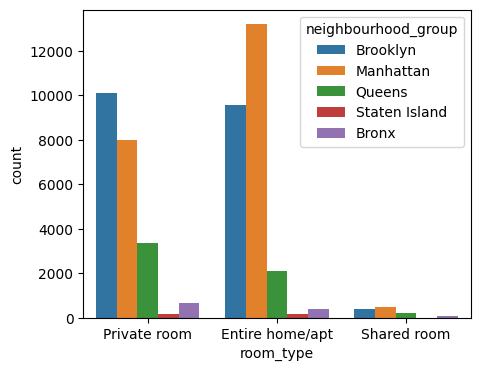

In [815]:
#ANALISIS CATEGORICO-CATEGORICO
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Del análisis categórico podemos concluir:

Manhattan es el Distrito con más lugares para alquilar, y el que tiene más Casas Enteras.

Brooklyn es el segundo grupo más grande, pero tiene más Habitaciones privadas, lo que significa que probablemente más personas comparten su casa o intentan aprovechar sus pisos.

Queens represneta el tercer lugar en cantida de viviendas y se distribuye entre Habitaciones privadas y Casas enteras ya que apenas tiene Habitaciones compartidas

Bronx posee algunas pocas Habitaciones privadas y de Casa enteras y una cantidad casi infima de Habitaciones compartidas.

Staten Island posee muy pocas habitaciones privadas (es el que menos tiene) y un minimo de Casa enteras

De los últimos dos grupos se podría decir que no son muy propensos a AirBnb.

In [816]:
titulo = "Agrupamos las unidades por Distrito"
print (titulo.center(50, "="))
# Variable que contenga las poblaciones requeridas.
distrito = ["Manhattan", "Brooklyn", "Queens", "Staten Island", "Bronx"]

# Creo una mascara para filtrar del listado de trabajo las poblaciones solicitadas.
mask = df['neighbourhood_group'].isin(distrito)

# Aplique la máscara al DataFrame para crear el subconjunto
subset_df = df[mask]


=======Agrupamos las unidades por Distrito========


*Pasamos a analizar los precios medios de cada Distrito y luego analizaremos cada barrio en relación a su Distrito

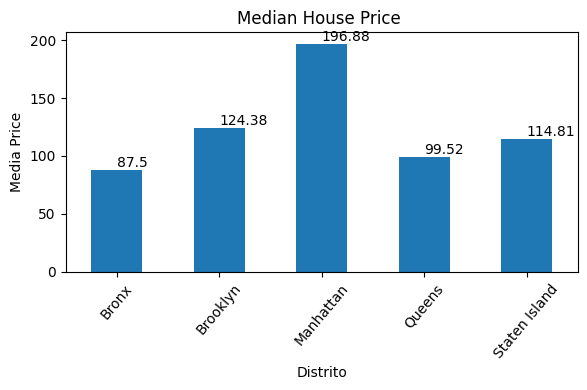

In [817]:
# Calcular el precio medio para cada ubicación
media_prices = subset_df.groupby('neighbourhood_group')['price'].mean()
resultado1 = round(media_prices,2)
# Cree un diagrama de barras de los precios medianos.
fig, ax = plt.subplots(figsize=(6, 4))
media_prices.plot.bar(rot=50, ax=ax)

# Establezco titulos y etiquetas
plt.title("Median House Price ")
plt.xlabel('Distrito')
plt.ylabel('Media Price')
for i, v in enumerate(resultado1):
    ax.text(i, v, str(v), va='bottom')
# Adjust layout
plt.tight_layout()
plt.show()

+ El gráfico nos permite observar que el precio medio de Manhattan se encuentra muy por encima del resto de los Distritos. El segundo Distrito con la media levemente mas alta que el resto es Brooklyn seguido por Staten Island.

*Analizaremos si la media de cada Barrio según el Distrito tiene una media logica o si en algún caso algún barrio contiene algún precio mas elevado.

Manhattan

In [818]:
#Obtengo un nuevo listado donde la población es Manhattan y me aseguro que traiga todas las filas exceptos las que en la columna 'price' sea 0.
Distrito_Manhattan = df.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] > 0)]


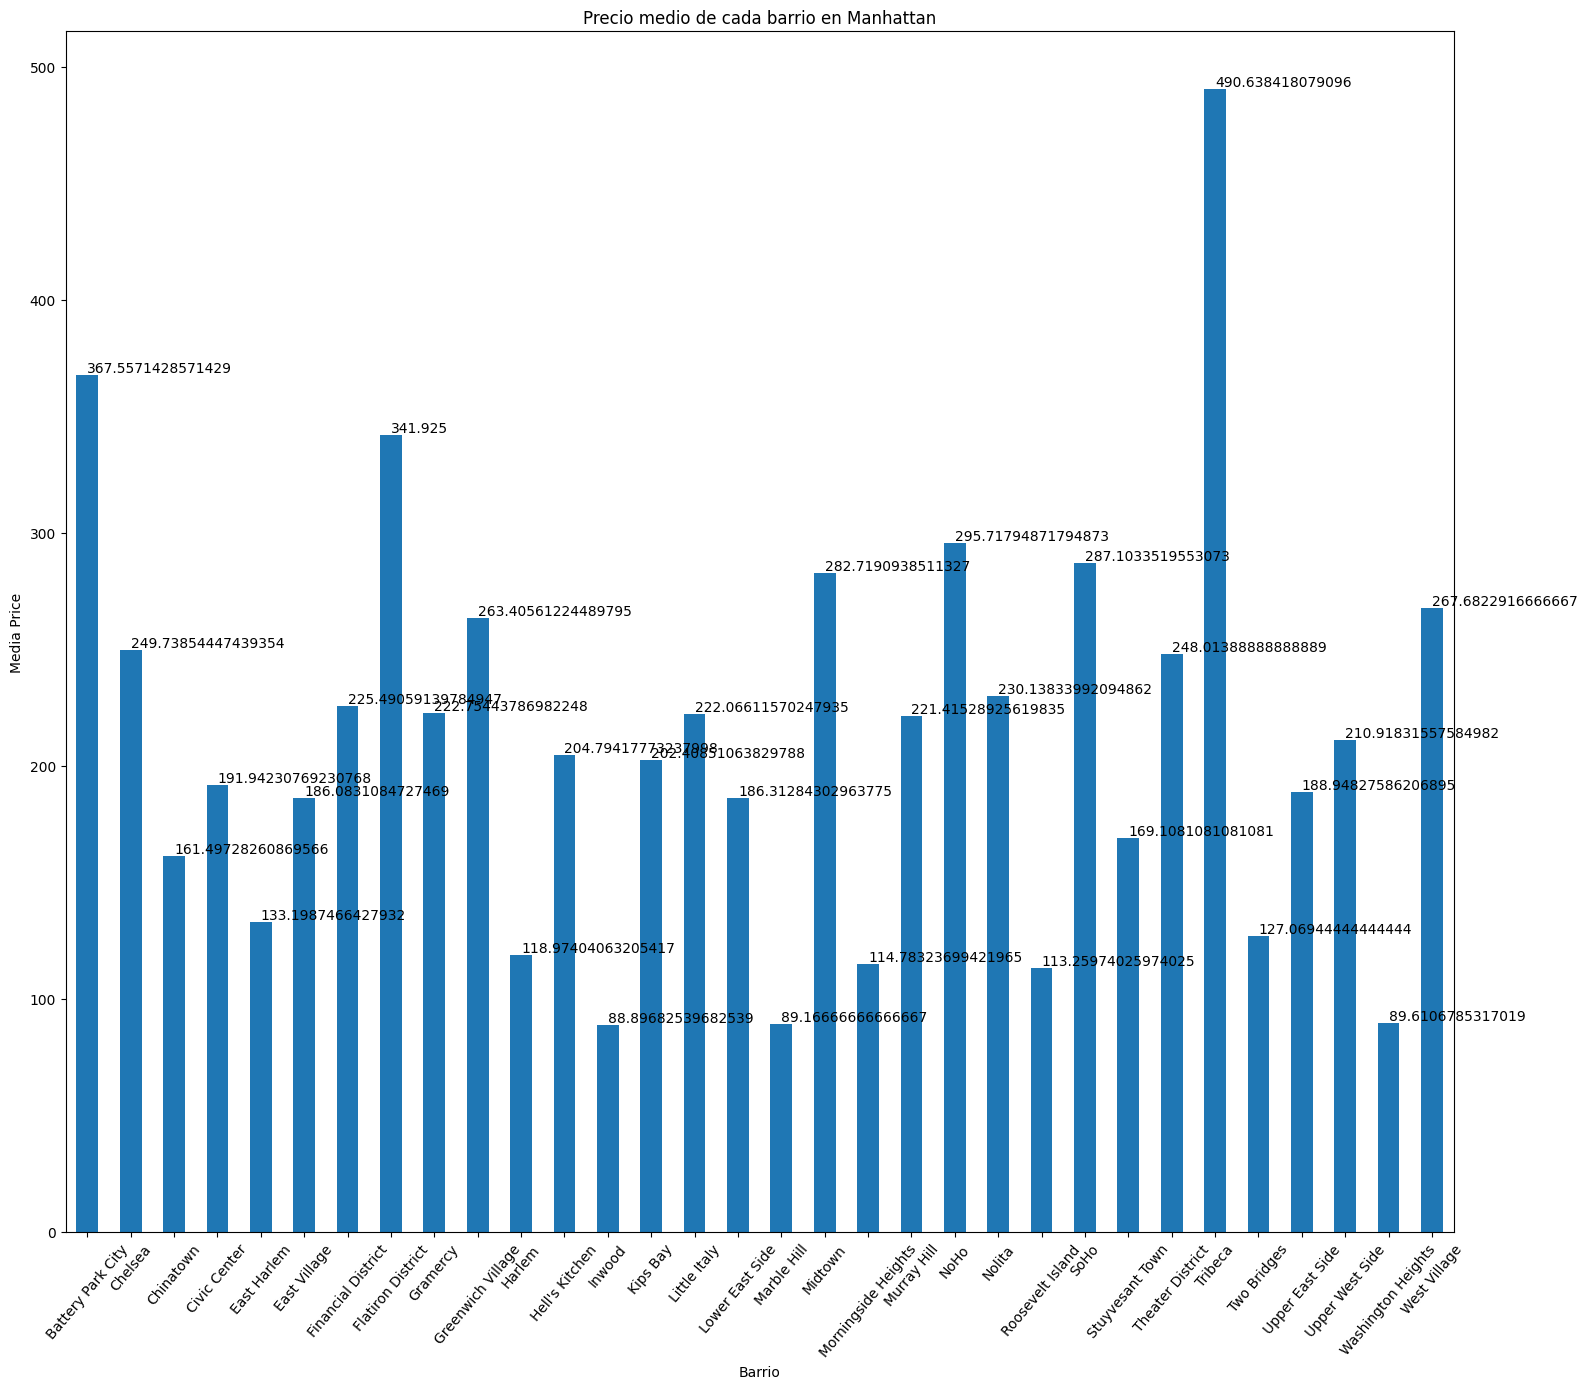

In [819]:
# Calculo el precio medio para cada barrio de Manhattan
mean_prices = Distrito_Manhattan.groupby('neighbourhood')['price'].mean()

# Creo un diagrama de barras de los precios medios.
fig, ax = plt.subplots(figsize=(16, 14))
mean_prices.plot.bar(rot=50, ax=ax)

# Establezco titulos y etiquetas
plt.title("Precio medio de cada barrio en Manhattan")
plt.xlabel('Barrio')
plt.ylabel('Media Price')
for i, v in enumerate(mean_prices):
    ax.text(i, v, str(v), va='bottom')
# Adjust layout
plt.tight_layout()
plt.show()

In [820]:
# Obtengo una lista con el precio medio para cada barrio
mean_prices = Distrito_Manhattan.groupby('neighbourhood')['price'].mean()
mean_prices = pd.to_numeric(mean_prices)
mean_prices.sort_values(ascending= False)


neighbourhood
Tribeca                490.638418
Battery Park City      367.557143
Flatiron District      341.925000
NoHo                   295.717949
SoHo                   287.103352
Midtown                282.719094
West Village           267.682292
Greenwich Village      263.405612
Chelsea                249.738544
Theater District       248.013889
Nolita                 230.138340
Financial District     225.490591
Gramercy               222.754438
Little Italy           222.066116
Murray Hill            221.415289
Upper West Side        210.918316
Hell's Kitchen         204.794178
Kips Bay               202.408511
Civic Center           191.942308
Upper East Side        188.948276
Lower East Side        186.312843
East Village           186.083108
Stuyvesant Town        169.108108
Chinatown              161.497283
East Harlem            133.198747
Two Bridges            127.069444
Harlem                 118.974041
Morningside Heights    114.783237
Roosevelt Island       113.259740


Analizo el barrio con la media mas alta

In [821]:
Barrio_Tribeca = df.loc[(df['neighbourhood'] == 'Tribeca')]
print("Cantidad de unidades en Tribeca :", (len(Barrio_Tribeca)))
DFSG= pd.DataFrame(Barrio_Tribeca)
DFSG.sort_values(by= 'price',ascending=False)

Cantidad de unidades en Tribeca : 177


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
30268,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,1
48043,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,1
15390,Manhattan,Tribeca,40.72138,-74.00767,Entire home/apt,2500,4,0,1
6620,Manhattan,Tribeca,40.71883,-74.00357,Entire home/apt,2400,1,2,1
38122,Manhattan,Tribeca,40.71546,-74.00856,Entire home/apt,2000,1,1,1
...,...,...,...,...,...,...,...,...,...
13233,Manhattan,Tribeca,40.71689,-74.00563,Private room,75,1,0,1
12852,Manhattan,Tribeca,40.71561,-74.00642,Private room,75,1,1,1
3814,Manhattan,Tribeca,40.72035,-74.00493,Private room,70,14,0,1
38147,Manhattan,Tribeca,40.72018,-74.00451,Private room,70,30,2,1


+ Podemos ver que en Manhattan si bien el precio medio del Distrito es de 196.88 sobre un total de , el barrio con la media mas alta es Tribeca, dicho sitio cuenta con 177 unidades en alquiler y con un alquiler medio de 490 dolares

In [822]:
#Obtengo un nuevo listado donde la población es Brooklyn y me aseguro que traiga todas las filas exceptos las que en la columna 'price' sea 0.
Distrito_Brooklyn = df.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] > 0)]

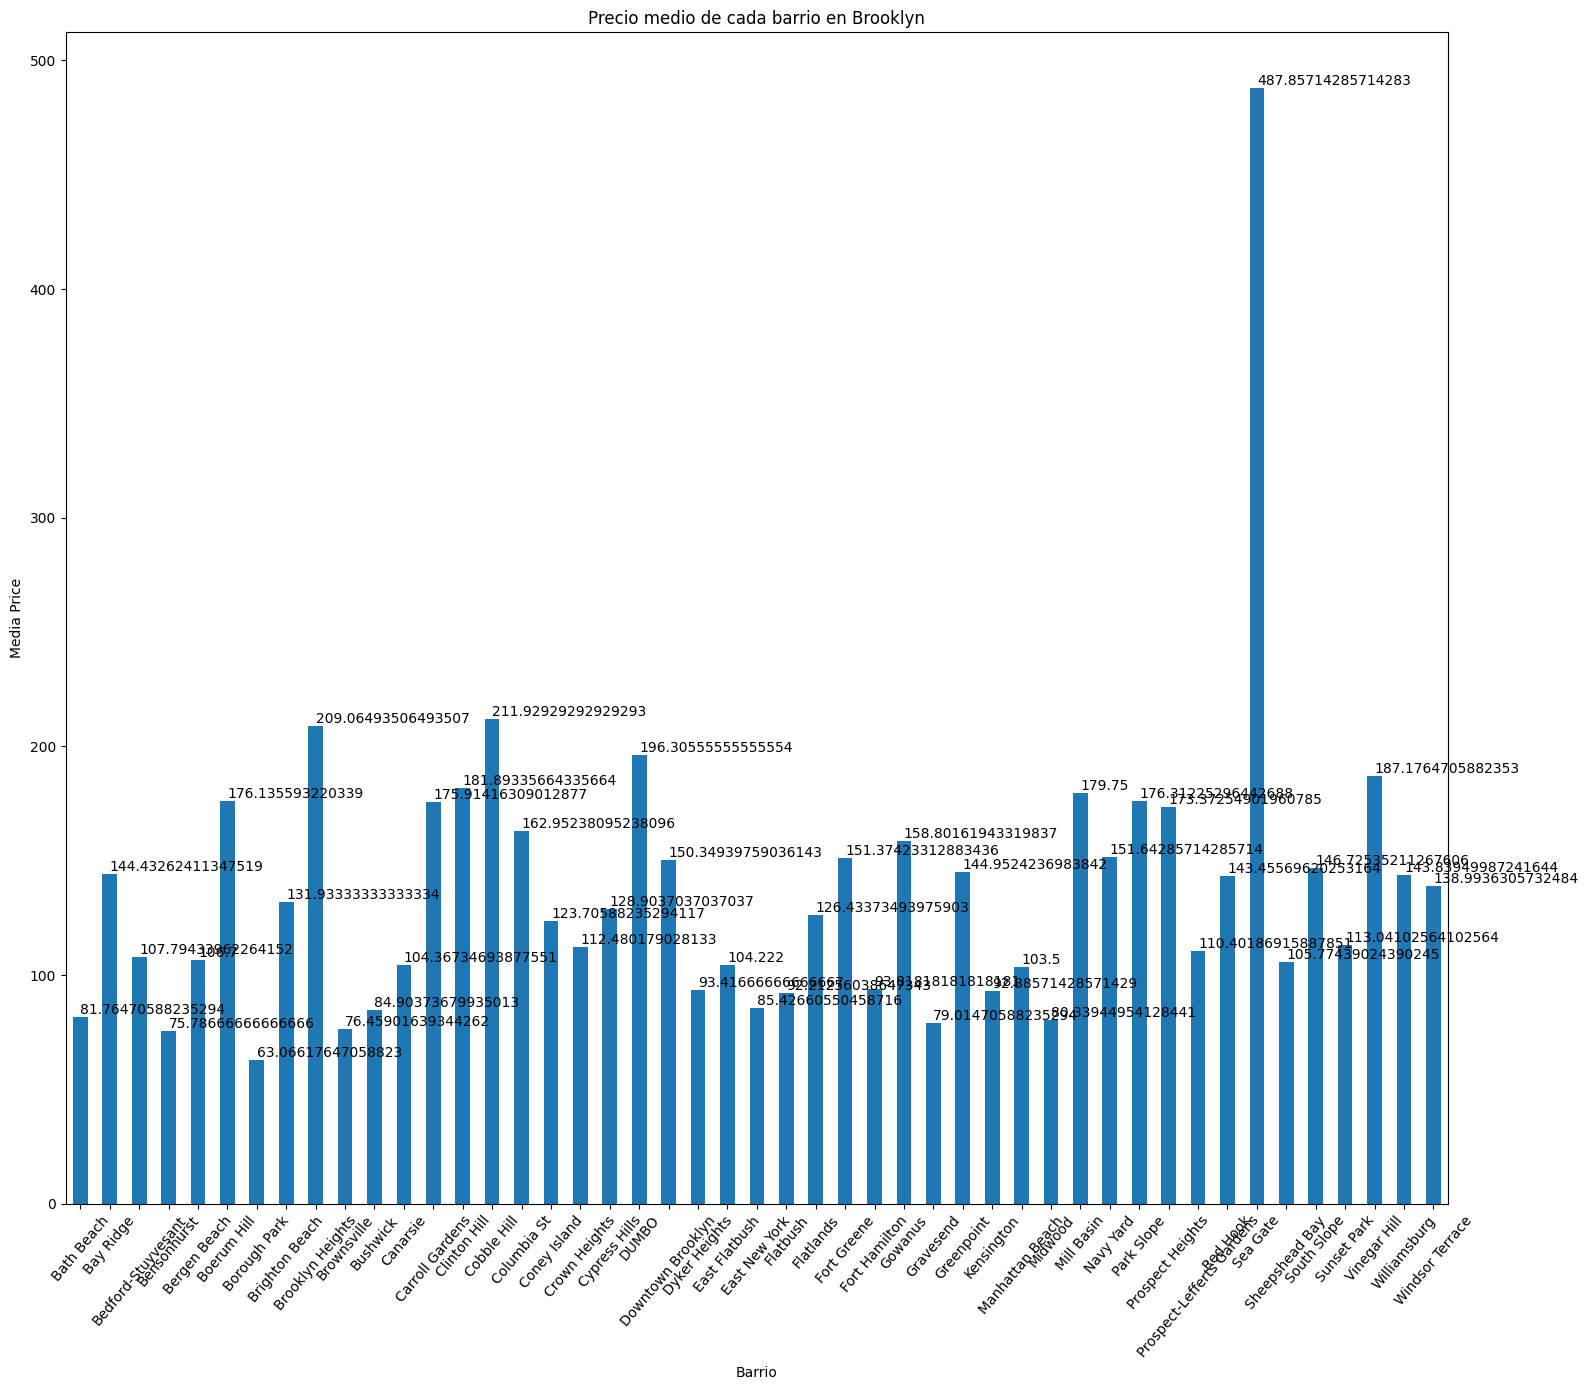

In [823]:
# Calculo el precio medio para cada barrio de Brooklyn
mean_prices = Distrito_Brooklyn.groupby('neighbourhood')['price'].mean()

# Creo un diagrama de barras de los precios medios.
fig, ax = plt.subplots(figsize=(16, 14))
mean_prices.plot.bar(rot=50, ax=ax)

# Establezco titulos y etiquetas
plt.title("Precio medio de cada barrio en Brooklyn")
plt.xlabel('Barrio')
plt.ylabel('Media Price')
for i, v in enumerate(mean_prices):
    ax.text(i, v, str(v), va='bottom')
# Adjust layout
plt.tight_layout()
plt.show()

In [824]:
# Obtengo una lista con el precio medio para cada barrio
mean_prices = Distrito_Brooklyn.groupby('neighbourhood')['price'].mean()
mean_prices = pd.to_numeric(mean_prices)
mean_prices.sort_values(ascending= False)

neighbourhood
Sea Gate                     487.857143
Cobble Hill                  211.929293
Brooklyn Heights             209.064935
DUMBO                        196.305556
Vinegar Hill                 187.176471
Clinton Hill                 181.893357
Mill Basin                   179.750000
Park Slope                   176.312253
Boerum Hill                  176.135593
Carroll Gardens              175.914163
Prospect Heights             173.372549
Columbia St                  162.952381
Gowanus                      158.801619
Navy Yard                    151.642857
Fort Greene                  151.374233
Downtown Brooklyn            150.349398
South Slope                  146.725352
Greenpoint                   144.952424
Bay Ridge                    144.432624
Williamsburg                 143.839500
Red Hook                     143.455696
Windsor Terrace              138.993631
Brighton Beach               131.933333
Cypress Hills                128.903704
Flatlands                 

Analizo al barrio con la media mas alta

In [825]:
Distrito_Sea_Gate = df.loc[(df['neighbourhood'] == 'Sea Gate')]
print("Cantidad de unidades en Sea Gate :", (len(Distrito_Sea_Gate)))
DFSG= pd.DataFrame(Distrito_Sea_Gate)
DFSG.sort_values(by= 'price',ascending=False)

Cantidad de unidades en Sea Gate : 7


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
3761,Brooklyn,Sea Gate,40.57645,-74.01065,Entire home/apt,1485,2,6,1
42172,Brooklyn,Sea Gate,40.57919,-74.00635,Entire home/apt,1315,10,0,1
15080,Brooklyn,Sea Gate,40.57804,-74.01024,Entire home/apt,223,1,1,3
43651,Brooklyn,Sea Gate,40.57453,-74.00828,Entire home/apt,125,10,1,1
48699,Brooklyn,Sea Gate,40.57531,-74.00518,Entire home/apt,99,4,0,1
15082,Brooklyn,Sea Gate,40.57774,-74.01022,Private room,97,1,2,3
15081,Brooklyn,Sea Gate,40.57857,-74.01012,Private room,71,1,0,3


Podemos ver que en Brooklyn si bien el precio medio del Distrito es de 124,38, el barrio con la media mas alta es SEA GATE, dicho sitio cuenta con 7 unidades en alquiler y con un alquiler medio de 487,85 dolares.

In [826]:
#Obtengo un nuevo listado donde la población es Queens y me aseguro que traiga todas las filas exceptos las que en la columna 'price' sea 0.
Distrito_Queens = df.loc[(df['neighbourhood_group'] == 'Queens') & (df['price'] > 0)]

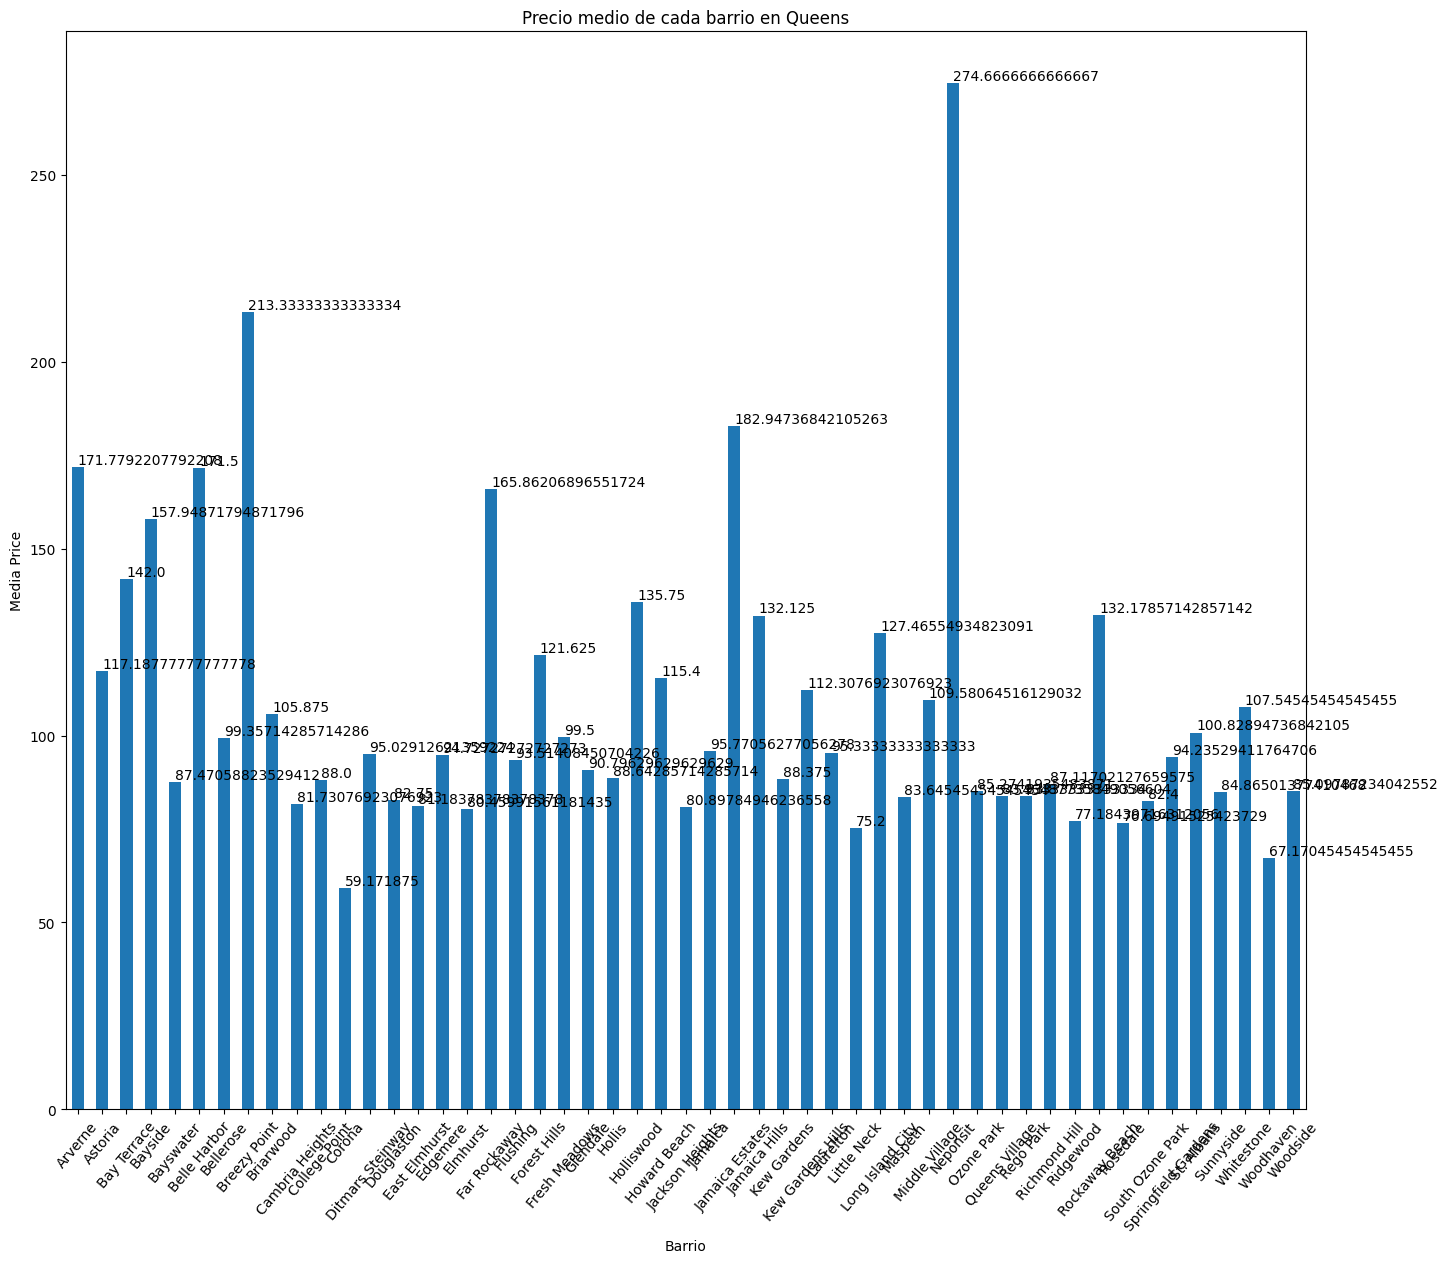

In [827]:
# Calculo el precio medio para cada barrio de Queens
media_prices = Distrito_Queens.groupby('neighbourhood')['price'].mean()

# Creo un diagrama de barras de los precios medios.
fig, ax = plt.subplots(figsize=(16, 14))
media_prices.plot.bar(rot=50, ax=ax)

# Establezco titulos y etiquetas
plt.title("Precio medio de cada barrio en Queens")
plt.xlabel('Barrio')
plt.ylabel('Media Price')
for i, v in enumerate(media_prices):
    ax.text(i, v, str(v), va='bottom')
# Adjust layout

In [828]:
# Obtengo una lista con el precio medio para cada barrio
mean_prices = Distrito_Queens.groupby('neighbourhood')['price'].mean()
mean_prices = pd.to_numeric(mean_prices)
mean_prices.sort_values(ascending= False)

neighbourhood
Neponsit               274.666667
Breezy Point           213.333333
Jamaica Estates        182.947368
Arverne                171.779221
Belle Harbor           171.500000
Far Rockaway           165.862069
Bayside                157.948718
Bay Terrace            142.000000
Holliswood             135.750000
Rockaway Beach         132.178571
Jamaica Hills          132.125000
Long Island City       127.465549
Forest Hills           121.625000
Astoria                117.187778
Howard Beach           115.400000
Kew Gardens Hills      112.307692
Middle Village         109.580645
Whitestone             107.545455
Briarwood              105.875000
St. Albans             100.828947
Fresh Meadows           99.500000
Bellerose               99.357143
Jamaica                 95.770563
Laurelton               95.333333
Ditmars Steinway        95.029126
Edgemere                94.727273
Springfield Gardens     94.235294
Flushing                93.514085
Glendale                90.796296


Analizo el barrio con la media mas alta

In [829]:
Barrio_Neponsit = df.loc[(df['neighbourhood'] == 'Neponsit')]
print("Cantidad de unidades en Neponsit :", (len(Barrio_Neponsit )))
BN= pd.DataFrame(Barrio_Neponsit)
BN.sort_values(by= 'price',ascending=False)

Cantidad de unidades en Neponsit : 3


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
9986,Queens,Neponsit,40.57215,-73.85822,Entire home/apt,350,2,5,1
23883,Queens,Neponsit,40.56931,-73.86122,Entire home/apt,274,2,34,1
31912,Queens,Neponsit,40.57043,-73.85821,Entire home/apt,200,2,7,1


Podemos ver que en el distrito de Queens si bien el precio medio es de 99,52, el barrio con la media mas alta es Neponsit, dicho sitio cuenta con 3 unidades en alquiler y con un alquiler medio de 274,67 dolares.

In [830]:
#Obtengo un nuevo listado donde la población es Bronx y me aseguro que traiga todas las filas exceptos las que en la columna 'price' sea 0.
Distrito_Bronx = df.loc[(df['neighbourhood_group'] == 'Bronx') & (df['price'] > 0)]

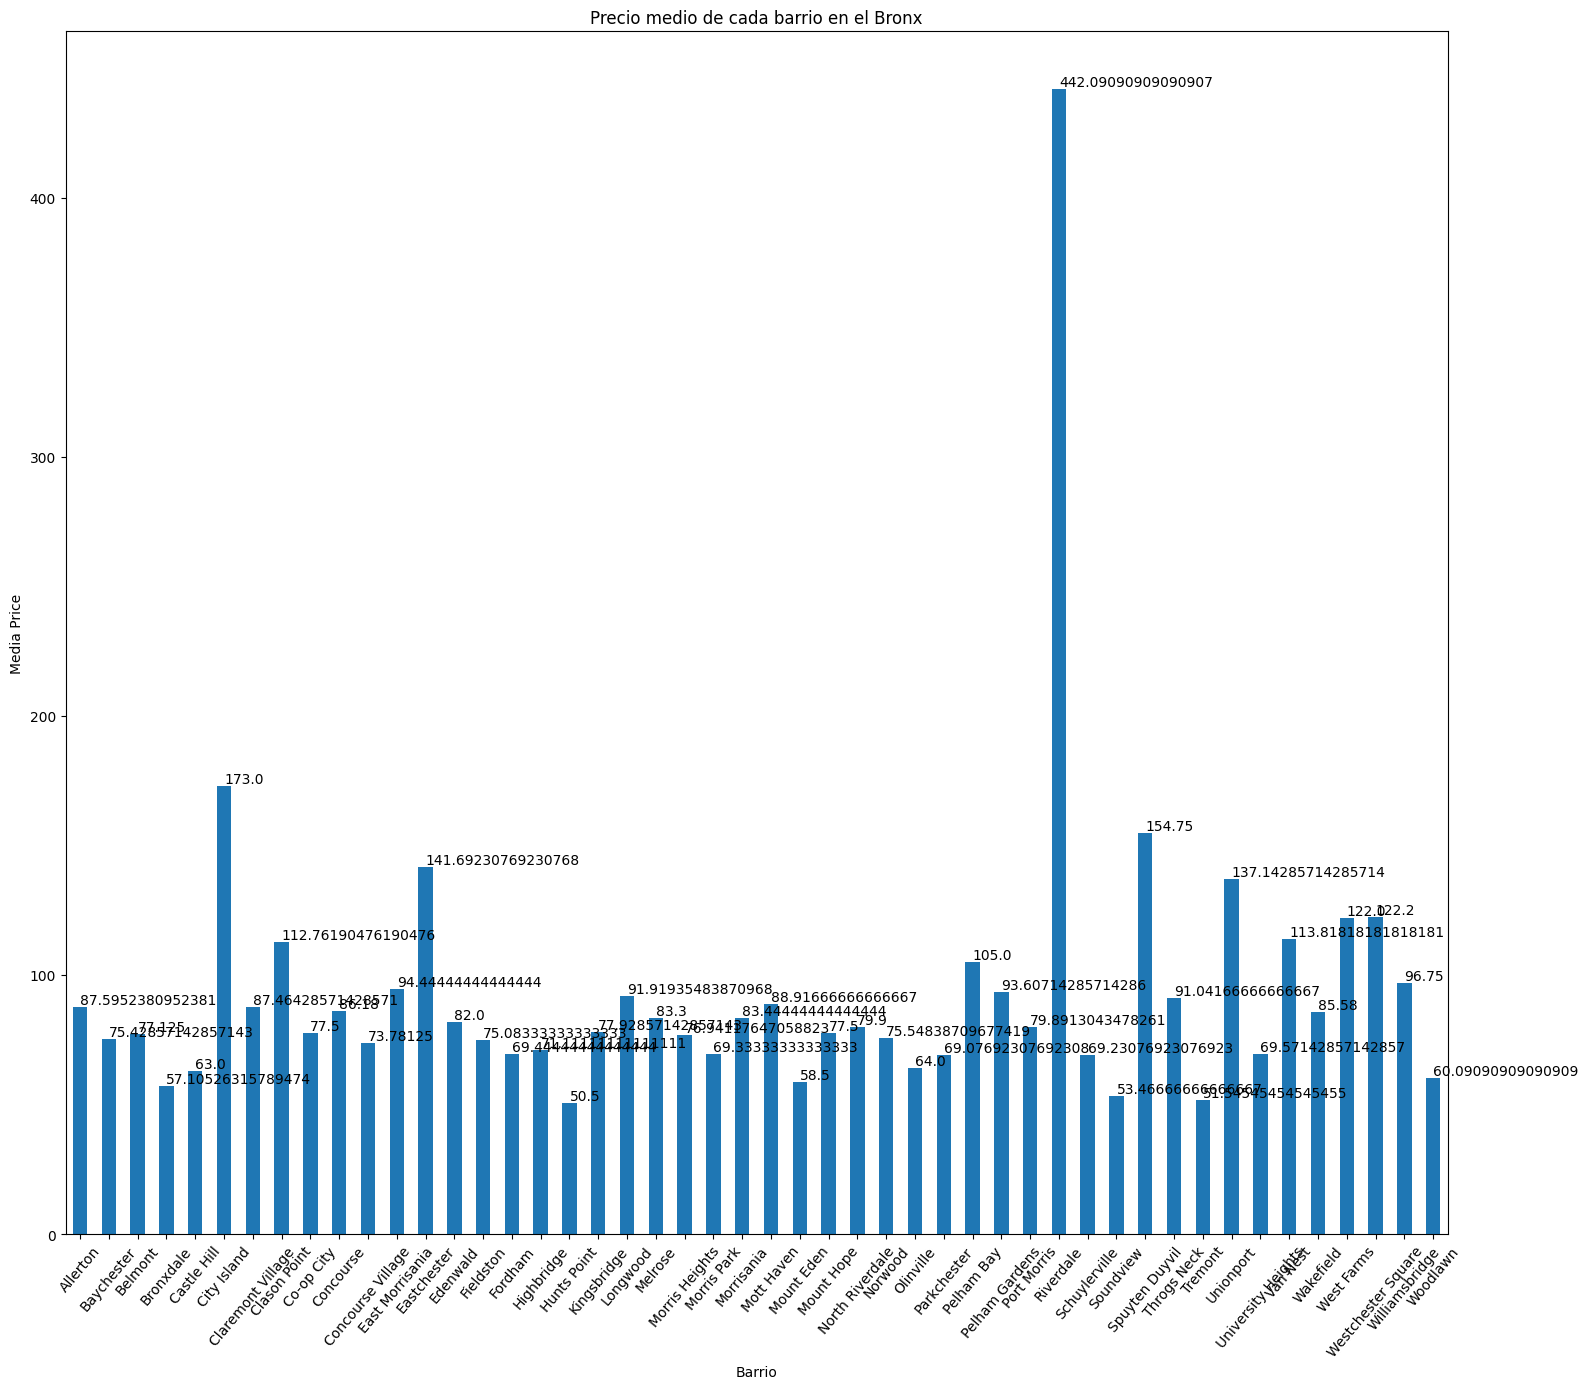

In [831]:
# Calculo el precio medio para cada barrio del Bronx
media_prices = Distrito_Bronx.groupby('neighbourhood')['price'].mean()

# Creo un diagrama de barras de los precios medios.
fig, ax = plt.subplots(figsize=(16, 14))
media_prices.plot.bar(rot=50, ax=ax)

# Establezco titulos y etiquetas
plt.title("Precio medio de cada barrio en el Bronx")
plt.xlabel('Barrio')
plt.ylabel('Media Price')
for i, v in enumerate(media_prices):
    ax.text(i, v, str(v), va='bottom')
# Adjust layout
plt.tight_layout()
plt.show()

In [832]:
# Obtengo una lista con el precio medio para cada barrio
mean_prices = Distrito_Bronx.groupby('neighbourhood')['price'].mean()
mean_prices = pd.to_numeric(mean_prices)
mean_prices.sort_values(ascending= False)

neighbourhood
Riverdale             442.090909
City Island           173.000000
Spuyten Duyvil        154.750000
Eastchester           141.692308
Unionport             137.142857
Westchester Square    122.200000
West Farms            122.000000
Van Nest              113.818182
Clason Point          112.761905
Pelham Bay            105.000000
Williamsbridge         96.750000
East Morrisania        94.444444
Pelham Gardens         93.607143
Longwood               91.919355
Throgs Neck            91.041667
Mott Haven             88.916667
Allerton               87.595238
Claremont Village      87.464286
Concourse              86.180000
Wakefield              85.580000
Morrisania             83.444444
Melrose                83.300000
Edenwald               82.000000
North Riverdale        79.900000
Port Morris            79.891304
Kingsbridge            77.928571
Mount Hope             77.500000
Co-op City             77.500000
Belmont                77.125000
Morris Heights         76.941

Analizo el barrio con la media mas alta

In [833]:
Barrio_Riverdale = df.loc[(df['neighbourhood'] == 'Riverdale')]
print("Cantidad de unidades en Riverdale :", (len(Barrio_Riverdale)))
BN= pd.DataFrame(Barrio_Riverdale)
BN.sort_values(by= 'price',ascending=False)

Cantidad de unidades en Riverdale : 11


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
24477,Bronx,Riverdale,40.88671,-73.91510,Private room,2500,2,0,3
25422,Bronx,Riverdale,40.88515,-73.91411,Shared room,800,2,1,3
25405,Bronx,Riverdale,40.88667,-73.91494,Private room,600,2,0,3
3809,Bronx,Riverdale,40.88579,-73.91599,Entire home/apt,250,7,2,1
38118,Bronx,Riverdale,40.88511,-73.90831,Entire home/apt,175,3,5,1
15038,Bronx,Riverdale,40.88830,-73.91665,Entire home/apt,150,2,79,1
46868,Bronx,Riverdale,40.88452,-73.91065,Entire home/apt,99,3,2,1
45410,Bronx,Riverdale,40.88523,-73.91231,Entire home/apt,90,30,0,1
12650,Bronx,Riverdale,40.88422,-73.90886,Entire home/apt,85,1,0,1
10848,Bronx,Riverdale,40.88837,-73.90939,Private room,65,1,202,1


Podemos ver que en el distrito del Bronx si bien el precio medio es de 87,5, el barrio con la media mas alta es Riverdale, dicho sitio cuenta con 11 unidades en alquiler y con una media de alquiler de 442.09 dolares.

In [834]:
#Obtengo un nuevo listado donde la población es Staten Island y me aseguro que traiga todas las filas exceptos las que en la columna 'price' sea 0.
Distrito_Staten_Island = df.loc[(df['neighbourhood_group'] == 'Staten Island') & (df['price'] > 0)]

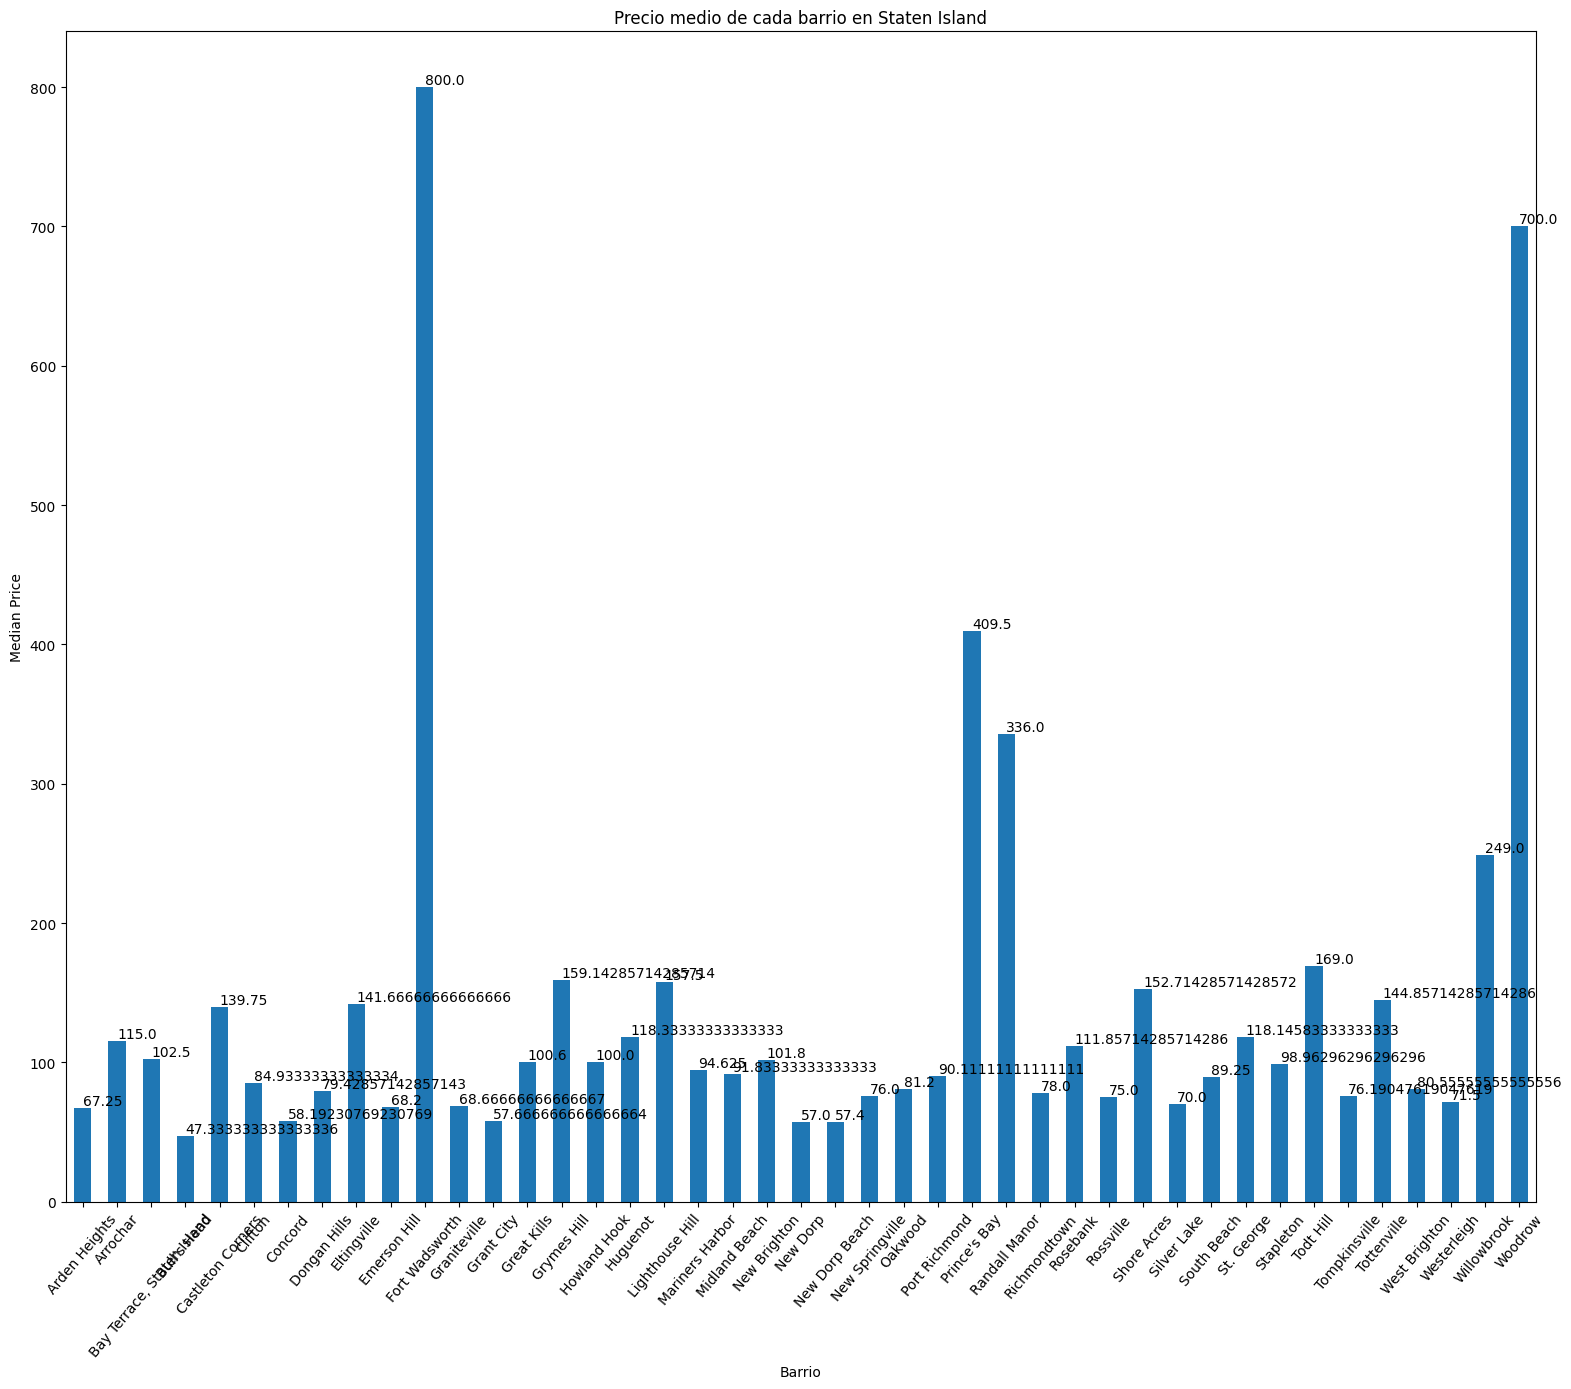

In [835]:
# Calculo el precio medio para el barrio de Staten Island
media_prices = Distrito_Staten_Island.groupby('neighbourhood')['price'].mean()

# Creo un diagrama de barras de los precios medios.
fig, ax = plt.subplots(figsize=(16, 14))
media_prices.plot.bar(rot=50, ax=ax)

# Establezco titulos y etiquetas
plt.title("Precio medio de cada barrio en Staten Island")
plt.xlabel('Barrio')
plt.ylabel('Median Price')
for i, v in enumerate(media_prices):
    ax.text(i, v, str(v), va='bottom')
# Adjust layout
plt.tight_layout()
plt.show()

In [836]:
# Obtengo una lista con el precio medio para cada barrio
mean_prices = Distrito_Staten_Island.groupby('neighbourhood')['price'].mean()
mean_prices = pd.to_numeric(mean_prices)
mean_prices.sort_values(ascending= False)

neighbourhood
Fort Wadsworth                800.000000
Woodrow                       700.000000
Prince's Bay                  409.500000
Randall Manor                 336.000000
Willowbrook                   249.000000
Todt Hill                     169.000000
Grymes Hill                   159.142857
Lighthouse Hill               157.500000
Shore Acres                   152.714286
Tottenville                   144.857143
Eltingville                   141.666667
Castleton Corners             139.750000
Huguenot                      118.333333
St. George                    118.145833
Arrochar                      115.000000
Rosebank                      111.857143
Bay Terrace, Staten Island    102.500000
New Brighton                  101.800000
Great Kills                   100.600000
Howland Hook                  100.000000
Stapleton                      98.962963
Mariners Harbor                94.625000
Midland Beach                  91.833333
Port Richmond                  90.111111
So

Analizo el barrio con la media mas alta

In [837]:
Barrio_Fort_Wadsworth = df.loc[(df['neighbourhood'] == 'Fort Wadsworth')]
print("Cantidad de unidades en Fort Wadsworth :", (len(Barrio_Fort_Wadsworth)))
BN= pd.DataFrame(Barrio_Fort_Wadsworth)
BN.sort_values(by= 'price',ascending=False)

Cantidad de unidades en Fort Wadsworth : 1


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
25386,Staten Island,Fort Wadsworth,40.59546,-74.06092,Entire home/apt,800,7,0,3


Podemos ver que en el distrito de Staten Island si bien el precio medio es de 114,81, el barrio con la media mas alta es Fort Wadsworth, dicho sitio cuenta con solo una unidad en alquiler y con un alquiler 800 dolares.

In [838]:
result = df.groupby(['neighbourhood_group', 'room_type']).agg({'price': 'mean', 'room_type': 'size'}).rename(columns={'price': 'price_mean', 'room_type': 'count'}).reset_index()

print(result)

   neighbourhood_group        room_type  price_mean  count
0                Bronx  Entire home/apt  127.506596    379
1                Bronx     Private room   66.788344    652
2                Bronx      Shared room   59.800000     60
3             Brooklyn  Entire home/apt  178.327545   9559
4             Brooklyn     Private room   76.500099  10132
5             Brooklyn      Shared room   50.527845    413
6            Manhattan  Entire home/apt  249.239109  13199
7            Manhattan     Private room  116.776622   7982
8            Manhattan      Shared room   88.977083    480
9               Queens  Entire home/apt  147.050573   2096
10              Queens     Private room   71.762456   3372
11              Queens      Shared room   69.020202    198
12       Staten Island  Entire home/apt  173.846591    176
13       Staten Island     Private room   62.292553    188
14       Staten Island      Shared room   57.444444      9


In [839]:
precio_medio_por_grupo = df.groupby('neighbourhood_group')['price'].mean()
print(precio_medio_por_grupo)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


Conclusión:
Podemos observar que según el distrito la media varia pero a la hora de analizar la media de los barrios no tiene mucha lógica ya que nos podemos encontrar con barrios donde la cantidad de unidades a alquilar no es representativa para el Distrito por l otanto este analisis solo sirve para ver curiosidades y tener en cuenta que dentro de cada Distrito los precios pueden variar mucho.
El Factor que si es determinante es el Tipo de unidad a alquilar

Analisis Variables Numericas

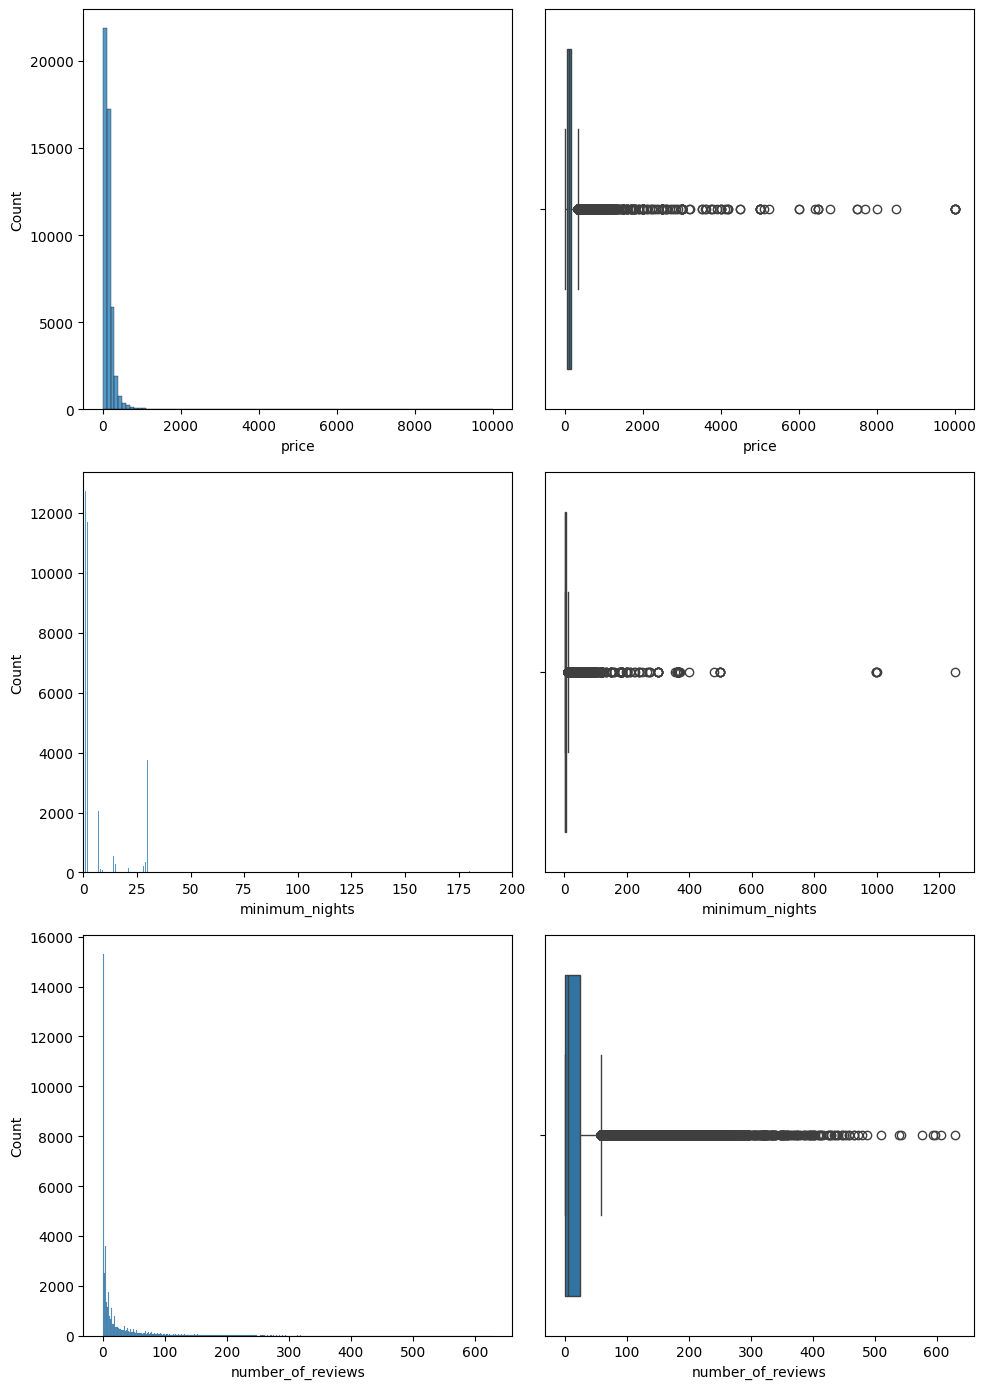

In [840]:
#Analisis Varibles Numericas
fig, axis = plt.subplots(3, 2, figsize = (10, 14))

sns.histplot(ax = axis[0, 0],bins=100, data = df, x = "price")
sns.boxplot(ax = axis[0, 1], data = df, x = "price")

sns.histplot(ax = axis[1, 0], data = df, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[2, 1], data = df, x = "number_of_reviews")


# Adjust layout
plt.tight_layout()

Podemos observar que las mayor cantidad de alquileres cuestan por debajo de los 250 dólares la noche, el gráfico nos permite ver que existen valores atipicos llegando incluso a valer 10.000 dólares.

La mayoria de las unidades en alquiler requieren como minimo una noche.

En cuanto a las reseñas podemos ver que en su mayoria las viviendas tienen una reseña y a medida que aumentan la cantidad de reseñas disminuye la cantidad de viviendas.

In [841]:
#Analisis descriptivo rapido
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000


In [842]:
# Variable a predecir PRECIO
y= df.price.values
y

array([149, 225, 150, ..., 115,  55,  90])

(array([4.766e+04, 9.370e+02, 1.330e+02, 5.500e+01, 3.300e+01, 2.400e+01,
        1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <BarContainer object of 20 artists>)

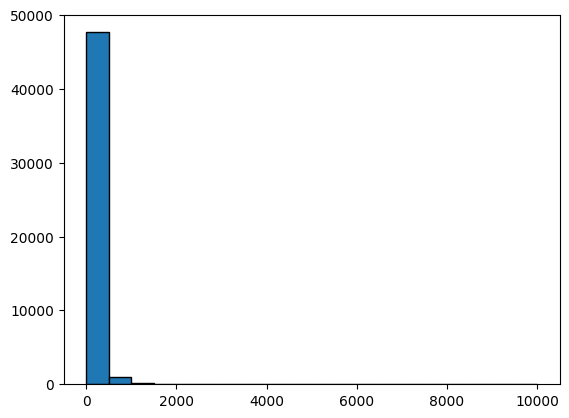

In [843]:
plt.hist(y, bins=20, edgecolor="black")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f36f76bfb90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f36f76bc750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f36f76bfbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f36f76ebdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f36f12529d0>],
 'means': []}

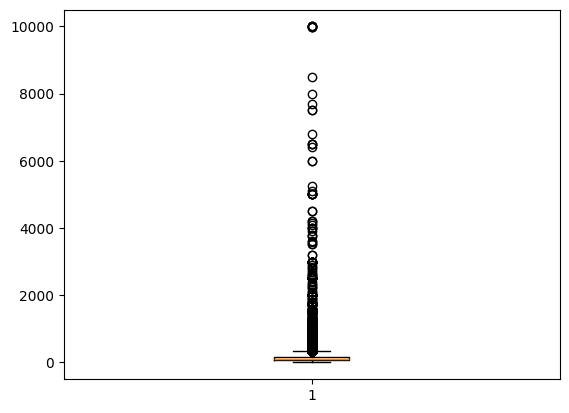

In [844]:
plt.boxplot(y)
# La variable no es simetrica, existen muchas casas por fuera del boxplot

Para que la variable precio se asemeje a una distribucion normal, se debe realizar la transformacion logaritmica.

Luego se eleva 10 y se obtiene el precio en la escala original(se precisa de NP)

In [845]:
df = df[df['price'] != 0]
df['LOG_PRICE'] = np.log(df.price)

/tmp/ipykernel_8306/1780335564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LOG_PRICE'] = np.log(df.price)


In [846]:
y = df['LOG_PRICE']

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

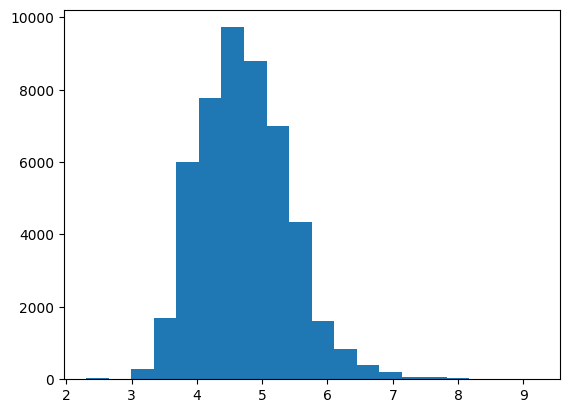

In [847]:
plt.hist(df['LOG_PRICE'], bins=20)
plt.plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f36f86d5210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f36f86d4910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f36f86d7310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f36f27c2cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f36f27c0c10>],
 'means': []}

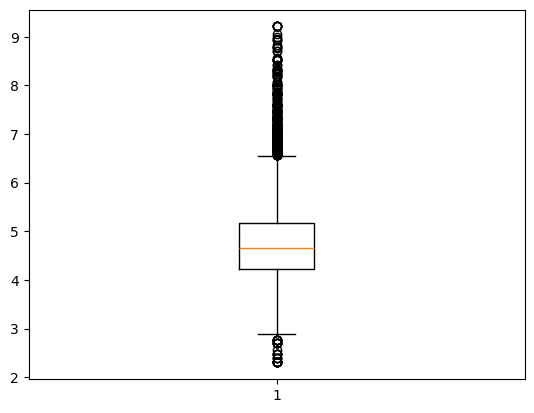

In [848]:
plt.boxplot(df['LOG_PRICE'])
#Se ve mejor aunque de todas formas hay valores que salen de los valores intercuartil

Estudio de los Valores Faltantes

In [849]:
#Porcentaje de valores vacios de cada columna
df.isna().mean()*100

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
LOG_PRICE                         0.0
dtype: float64

No existen valores faltantes

Paso 4: Análisis de variables multivariante Análisis numérico-numérico

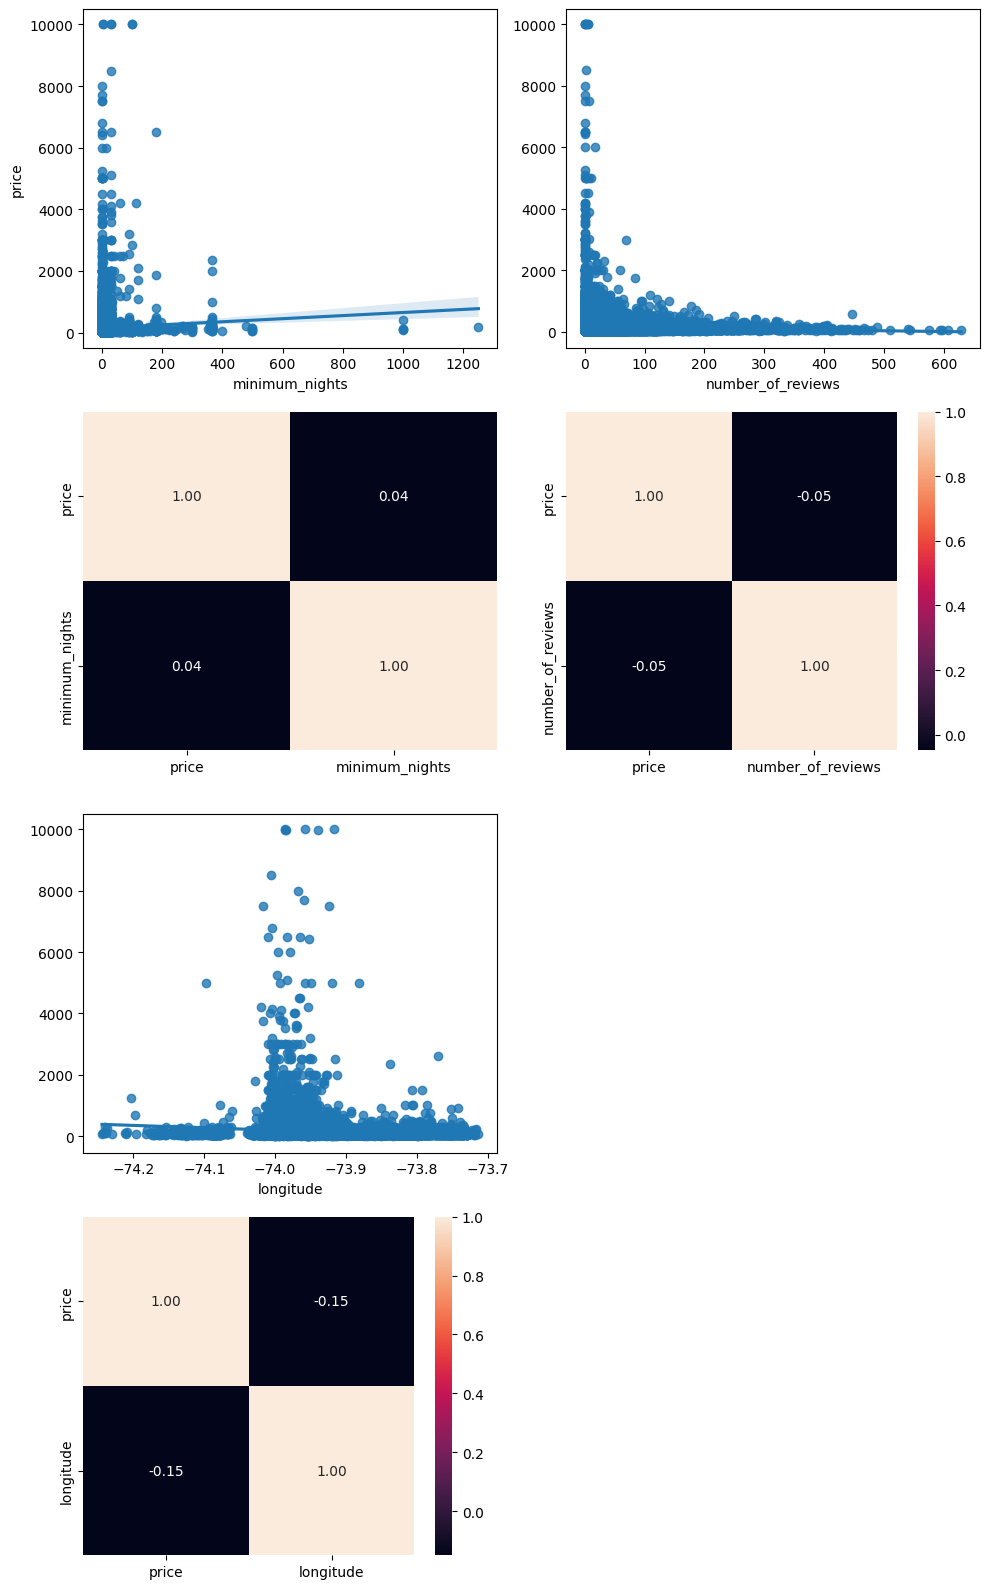

In [850]:
# Analisis numérico-numéricos

# Crear subplot
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "longitude", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Al observar las relaciones anteriores, vemos que por los valores de correlación:

No existe relación entre el precio y el mínimo de noches.

Se observa que los alquileres por debajo de los 1000 dolares tiene mas reseñas, pero no hay una relación importante.

Se observa que entre las longitudes -74 y -73,9 se enceuntran mas unidades con valores altos de alquiler.

/tmp/ipykernel_8306/2352030726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["room_type"] = pd.factorize(df["room_type"])[0]
/tmp/ipykernel_8306/2352030726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
/tmp/ipykernel_8306/2352030726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

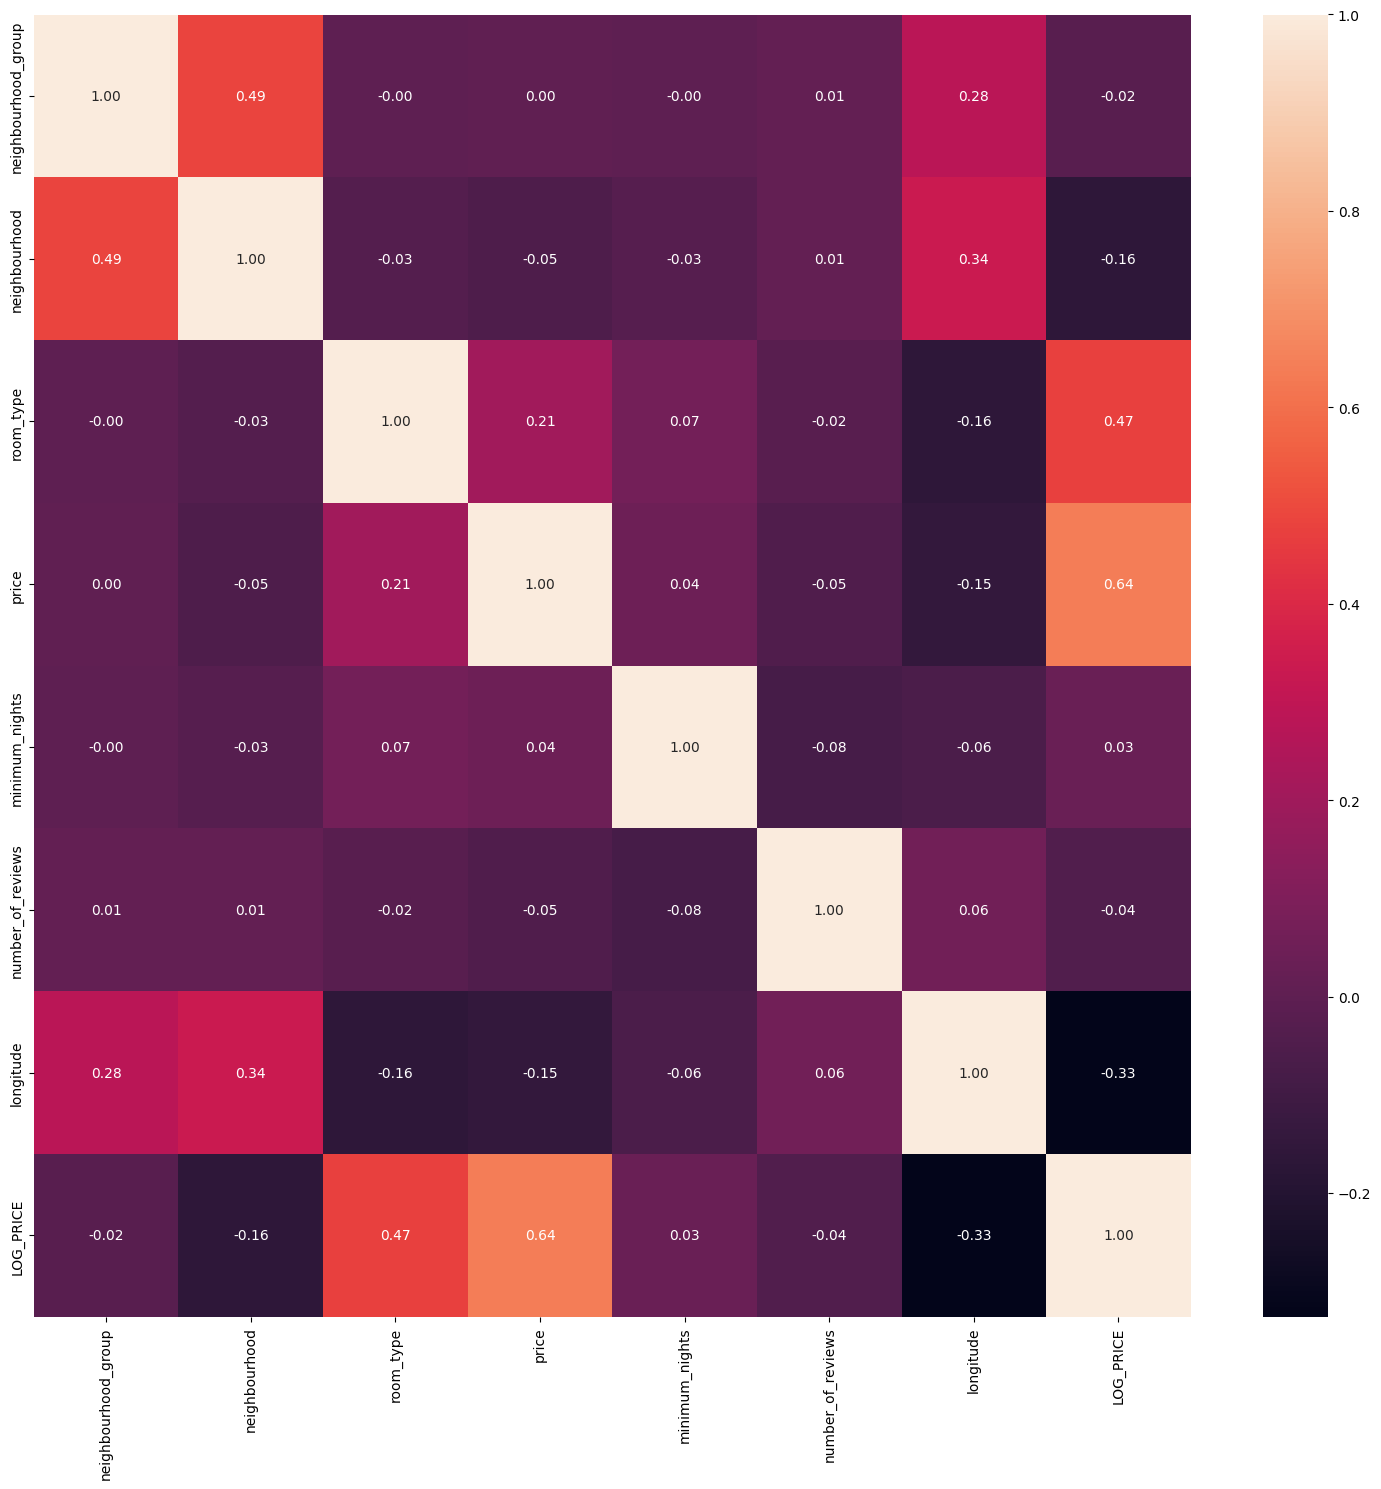

In [851]:
#Analisis numerico categorico
# Factorize the Room Type and Neighbourhood Data
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",
                        "number_of_reviews", "longitude", "LOG_PRICE"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Al observar los datos aquí, Podemos determinar que existe una relación entre el precio y el tipo de habitación y un relación mas leve del precio respecto al barrio y el tipo de anfitrion.

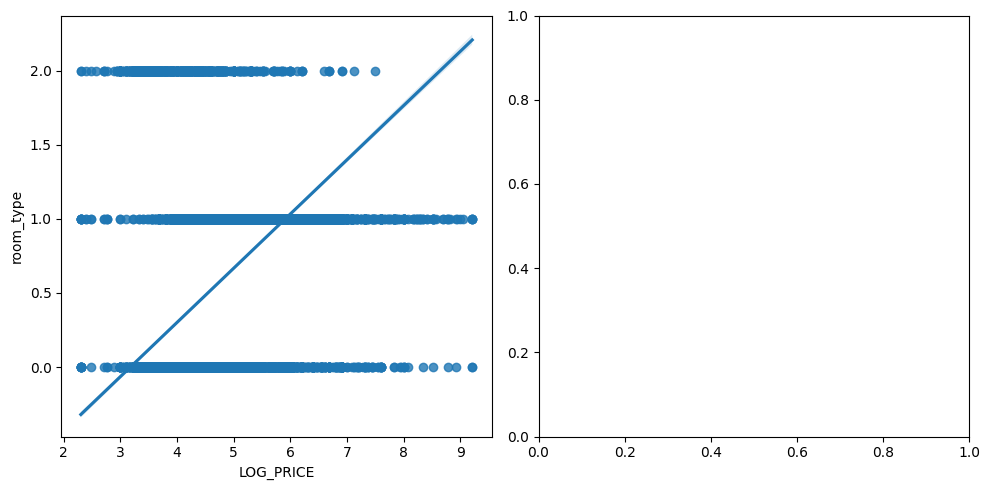

In [852]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "LOG_PRICE", y = "room_type")


plt.tight_layout()

plt.show()

In [853]:
print(df['room_type'].value_counts())

room_type
1    25407
0    22319
2     1158
Name: count, dtype: int64


+Se puede observar que a medida que aumenta el precio ya no encontramos habitaciones compartidas y poco a poco tampoco habitaciones privadas, quedandonos las casas enteras. *Casa Entera 1 Habitación privada 0 Habitación comp. 2

In [854]:
#Outlier detection for price
# Stats for Price
price_stats = df["price"].describe()
price_stats

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [855]:
# IQR for Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f'Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)} con un rango intercuartil de {round(price_iqr, 2)}')

Los límites superior e inferior para encontrar valores atípicos son 334.0 y -90.0 con un rango intercuartil de 106.0


In [856]:
count_0 = df[df["price"] == 0].shape
count_1 = df[df["price"] == 1].shape

In [857]:
print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  (0, 10)
Count of 1:  (0, 10)


Outlier detection for minimum_nights

In [858]:
nights_stats = df["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [859]:
# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f'Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)} con un rango intercuartil de {round(nights_iqr, 2)}')

Los límites superior e inferior para encontrar valores atípicos son 11.0 y -5.0 con un rango intercuartil de 4.0


Outlier detection for number_of_reviews

In [860]:
# Stats for number_of_reviews

review_stats = df["number_of_reviews"].describe()
review_stats

count    48884.000000
mean        23.271991
std         44.551331
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [861]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f'Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(review_iqr, 2)}')

Los límites superior e inferior para encontrar valores atípicos son 58.5 y -33.5, con un rango intercuartil de 23.0


In [862]:
#Outlier detection for calculated_host_listings_count
# Stats for calculated_host_listings_count

hostlist_stats = df["calculated_host_listings_count"].describe()
hostlist_stats

count    48884.000000
mean         7.144628
std         32.956185
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [863]:
# IQ for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f'Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(hostlist_iqr, 2)}')

Los límites superior e inferior para encontrar valores atípicos son 3.5 y -0.5, con un rango intercuartil de 1.0


Paso 6: Selección de características

In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48884 non-null  int64  
 1   neighbourhood                   48884 non-null  int64  
 2   latitude                        48884 non-null  float64
 3   longitude                       48884 non-null  float64
 4   room_type                       48884 non-null  int64  
 5   price                           48884 non-null  int64  
 6   minimum_nights                  48884 non-null  int64  
 7   number_of_reviews               48884 non-null  int64  
 8   calculated_host_listings_count  48884 non-null  int64  
 9   LOG_PRICE                       48884 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 4.1 MB


In [865]:
#Vamos a identificar las variables x de la Y que identifican el precio de la vivienda, lo hacemos simplemente para identificar si tenemos casa o observaciones influyentes en el conjunto de datos.

X = df.drop(['price','LOG_PRICE'], axis=1)
y = df['LOG_PRICE']

In [866]:
#Ahora necesitamos un modelo que nos haga el mapeo (la libreria es STATSmodel)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [867]:
cook_distance = model.get_influence().cooks_distance[0]

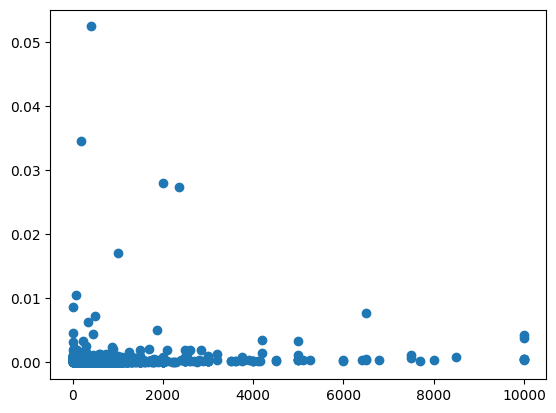

In [868]:
plt.scatter(df.price, cook_distance)
plt.show()

In [869]:
np.where(cook_distance>0.01)

(array([ 2854,  5767, 13788, 17811, 26332, 44418]),)

In [870]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,LOG_PRICE
0,0,0,40.64749,-73.97237,0,149,1,9,6,5.003946
1,1,1,40.75362,-73.98377,1,225,1,45,2,5.416100
2,1,2,40.80902,-73.94190,0,150,3,0,1,5.010635
3,0,3,40.68514,-73.95976,1,89,1,270,1,4.488636
4,1,4,40.79851,-73.94399,1,80,10,9,1,4.382027


In [871]:
df.iloc[[ 2854,  5767, 13788, 17811, 26332, 44418],:]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,LOG_PRICE
2854,1,101,40.71239,-74.01620,1,400,1000,0,1,5.991465
5767,1,52,40.73293,-73.99782,1,180,1250,2,1,5.192957
13788,0,12,40.71141,-73.95155,0,1002,365,10,1,6.909753
17811,2,63,40.72064,-73.83746,1,2350,365,0,1,7.762171
26341,0,12,40.71772,-73.95059,0,79,999,24,6,4.369448
44429,2,56,40.75593,-73.91276,0,2000,365,0,2,7.600902


In [872]:
df.drop([2854,  5767, 13788, 17811, 26332, 44418], axis=0, inplace=True)

/tmp/ipykernel_8306/632665994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([2854,  5767, 13788, 17811, 26332, 44418], axis=0, inplace=True)


Identificación de la presencia y tratamiento de valores ATÍPICOS

In [873]:
df.apply(lambda x: x.skew())

neighbourhood_group                1.384433
neighbourhood                      2.246444
latitude                           0.236875
longitude                          1.284712
room_type                          0.180365
price                             19.159449
minimum_nights                    18.342835
number_of_reviews                  3.690956
calculated_host_listings_count     7.931749
LOG_PRICE                          0.606972
dtype: float64

In [874]:
#Debemos trabajar solo con columnas numericas asi que Checkeamos si hay columnas binarias y si hay las eliminamos, en este caso no las hay

binary_cols = df[(df==0)|(df==1)].dropna(axis=1).columns
binary_cols

Index([], dtype='object')

In [875]:
df_numerical= df.drop(binary_cols, axis=1)
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48878 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48878 non-null  int64  
 1   neighbourhood                   48878 non-null  int64  
 2   latitude                        48878 non-null  float64
 3   longitude                       48878 non-null  float64
 4   room_type                       48878 non-null  int64  
 5   price                           48878 non-null  int64  
 6   minimum_nights                  48878 non-null  int64  
 7   number_of_reviews               48878 non-null  int64  
 8   calculated_host_listings_count  48878 non-null  int64  
 9   LOG_PRICE                       48878 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 4.1 MB


In [876]:
# Función para calcular IQR y aplicar winsorización (clase)
def winsorize_column(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

In [877]:
# Calcular el IQR y aplicar winsorización a cada columna
for column in df_numerical.columns:
    df_numerical[column] = winsorize_column(df_numerical[column], 0.25, 0.75)

In [878]:
df_numerical.apply(lambda x: x.skew())

neighbourhood_group               0.569382
neighbourhood                     1.135395
latitude                          0.237074
longitude                         0.531482
room_type                         0.180365
price                             1.023549
minimum_nights                    1.286469
number_of_reviews                 1.228995
calculated_host_listings_count    1.154094
LOG_PRICE                         0.325687
dtype: float64

Realizo el paso de concatenar aunque en nuestra caso no haria falta ya que no tenemos columnas binarias

In [879]:
df_new = pd.concat([df_numerical, df[binary_cols]], axis=1)

In [880]:
df_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,LOG_PRICE
0,0.0,0.0,40.64749,-73.97237,0,149,1,9.0,3.5,5.003946
1,1.0,1.0,40.75362,-73.98377,1,225,1,45.0,2.0,5.416100
2,1.0,2.0,40.80902,-73.94190,0,150,3,0.0,1.0,5.010635
3,0.0,3.0,40.68514,-73.95976,1,89,1,58.5,1.0,4.488636
4,1.0,4.0,40.79851,-73.94399,1,80,10,9.0,1.0,4.382027


In [881]:
from sklearn.ensemble import IsolationForest
# Crea un modelo de Isolation Forest y ajustalo a los datos
model = IsolationForest().fit(df_new)

In [882]:
# Predice si cada observación es un valor atípico (anomalía) o no
predictions = model.predict(df_new)

In [883]:
# 'predictions' contendrá 1 para observaciones normales y -1 para valores atípicos
print(f'Observaciones predichas como atípicas: {np.where(predictions==-1)[0]}')

Observaciones predichas como atípicas: [    0     1     6 ... 48865 48872 48876]


In [884]:
##Consultar
len(np.where(predictions==-1)[0])

18712

In [885]:
df_new

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,LOG_PRICE
0,0.0,0.0,40.64749,-73.97237,0,149,1,9.0,3.5,5.003946
1,1.0,1.0,40.75362,-73.98377,1,225,1,45.0,2.0,5.416100
2,1.0,2.0,40.80902,-73.94190,0,150,3,0.0,1.0,5.010635
3,0.0,3.0,40.68514,-73.95976,1,89,1,58.5,1.0,4.488636
4,1.0,4.0,40.79851,-73.94399,1,80,10,9.0,1.0,4.382027
...,...,...,...,...,...,...,...,...,...,...
48890,0.0,6.0,40.67853,-73.94995,0,70,2,0.0,2.0,4.248495
48891,0.0,21.0,40.70184,-73.93317,0,40,4,0.0,2.0,3.688879
48892,1.0,2.0,40.81475,-73.94867,1,115,10,0.0,1.0,4.744932
48893,1.0,7.0,40.75751,-73.99112,2,55,1,0.0,3.5,4.007333


Relación entre las variables

Matriz de correlaciones

In [886]:
corr = df_new.corr()
corr.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
LOG_PRICE                         0
dtype: int64

In [887]:
df_corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,LOG_PRICE
neighbourhood_group,1.000,0.410,0.530,0.247,0.005,0.020,-0.027,0.014,0.088,0.008
neighbourhood,0.410,1.000,-0.173,0.277,-0.033,-0.136,-0.073,0.025,0.071,-0.160
latitude,0.530,-0.173,1.000,0.110,-0.002,0.075,0.031,-0.026,-0.001,0.083
longitude,0.247,0.277,0.110,1.000,-0.186,-0.365,-0.121,0.081,0.079,-0.388
room_type,0.005,-0.033,-0.002,-0.186,1.000,0.471,0.128,-0.015,-0.088,0.485
price,0.020,-0.136,0.075,-0.365,0.471,1.000,0.053,-0.066,-0.056,0.962
minimum_nights,-0.027,-0.073,0.031,-0.121,0.128,0.053,1.000,-0.210,0.182,0.042
number_of_reviews,0.014,0.025,-0.026,0.081,-0.015,-0.066,-0.210,1.000,0.052,-0.047
calculated_host_listings_count,0.088,0.071,-0.001,0.079,-0.088,-0.056,0.182,0.052,1.000,-0.091
LOG_PRICE,0.008,-0.160,0.083,-0.388,0.485,0.962,0.042,-0.047,-0.091,1.000


In [888]:
df_corr[df_corr.LOG_PRICE.abs()<0.05].index

Index(['neighbourhood_group', 'minimum_nights', 'number_of_reviews'], dtype='object')

In [889]:
df_corr[df_corr.LOG_PRICE.abs()>0.25].index

Index(['longitude', 'room_type', 'price', 'LOG_PRICE'], dtype='object')

In [890]:
vif = pd.Series([variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])], index=df_corr.columns)
vif

neighbourhood_group                12.147336
neighbourhood                       6.800393
latitude                            8.439288
longitude                           3.356976
room_type                           3.343435
price                             871.839965
minimum_nights                      1.661923
number_of_reviews                   1.469755
calculated_host_listings_count      1.786614
LOG_PRICE                         929.054077
dtype: float64

Estos valores de VIF sugieren que no hay colinealidad entre estas variables (mas allá del precio y log_precio) y que podrían estar causando problemas en un modelo de regresión.

Partición

In [891]:
X = df_new.drop(['LOG_PRICE','price'], axis=1)
y = df_new['LOG_PRICE']

In [892]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [893]:
# Vamos a usar un método embebido que nos informe de la importancia de las características
# Creamos un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

In [894]:
# Entrenamos el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [895]:
# Calculamos la importancia de las características
feature_importances = model.feature_importances_

In [896]:
# Asociamos las importancias con los nombres de las características
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

In [897]:
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

In [898]:
# Imprimimos la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance}')

Feature: room_type, Importance: 0.8420078158378601
Feature: longitude, Importance: 0.0408058799803257
Feature: latitude, Importance: 0.028389109298586845
Feature: calculated_host_listings_count, Importance: 0.024401400238275528
Feature: neighbourhood, Importance: 0.022390082478523254
Feature: minimum_nights, Importance: 0.019344814121723175
Feature: number_of_reviews, Importance: 0.01413758471608162
Feature: neighbourhood_group, Importance: 0.008523317985236645


In [899]:

def get_vars_to_delete(d_features_imp, corr_mat, imp_cut=0.01, corr_cut=0.1):
  # Features with correlation less than corr_cut
  corr_features = corr_mat[corr_mat.LOG_PRICE.abs()<corr_cut].index
  # Features to delete
  return [var for var in corr_features if d_features_imp[var]<imp_cut]

X_corr = X_train.copy()
X_corr['LOG_PRICE'] = y_train.values

vars_to_delete = get_vars_to_delete(sorted_feature_importance, X_corr.corr())
vars_to_delete


['neighbourhood_group']

In [900]:
print(f'Porcentaje de variables a eliminar {len(vars_to_delete)/X_train.shape[1]*100}')

Porcentaje de variables a eliminar 12.5


In [901]:
# Eliminamos las variables poco correlacionadas con la variable respuesta y que además tienen poca importancia relativa
X_train.drop(vars_to_delete, axis=1, inplace=True)
X_test.drop(vars_to_delete, axis=1, inplace=True)

Escalado de los datos

In [902]:
# Seleccionamos las variables no binarias
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [903]:
# Instanciamos el escalador y lo ajustamos a los datos de entrenamiento
scaler = MinMaxScaler().fit(X_train_num)

In [904]:

# Transformamos los datos de entrenamiento y testeo
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [905]:
print(np.min(X_train_num_sc, axis=1), np.max(X_train_num_sc, axis=1),)

[0.         0.         0.         ... 0.         0.         0.01242236] [1.         1.         1.         ... 0.50878927 0.66594348 1.        ]


In [906]:

# Unimos las variables escaladas con las binarias
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)


In [907]:
X_train_sc.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count
0,0.484472,0.566495,0.743455,0.0,0.0,1.000000,0.4
1,1.000000,0.330077,0.231540,0.5,0.2,0.000000,0.0
2,0.086957,0.638659,0.371634,0.5,1.0,0.000000,1.0
3,0.236025,0.512577,0.382641,0.5,0.1,0.324786,0.0
4,0.484472,0.530584,0.719625,0.0,1.0,0.000000,0.0
